<a href="https://colab.research.google.com/github/bamtak/AI-Playground/blob/master/Computer_vision_foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O lane-image.jpg https://github.com/bamtak/AI-Playground/blob/master/notebook/lane-image.jpg?raw=true 

--2020-04-19 09:57:18--  https://github.com/bamtak/AI-Playground/blob/master/notebook/lane-image.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bamtak/AI-Playground/raw/master/notebook/lane-image.jpg [following]
--2020-04-19 09:57:18--  https://github.com/bamtak/AI-Playground/raw/master/notebook/lane-image.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bamtak/AI-Playground/master/notebook/lane-image.jpg [following]
--2020-04-19 09:57:18--  https://raw.githubusercontent.com/bamtak/AI-Playground/master/notebook/lane-image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443..

In [0]:
!pip install sendgrid

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for python-http-client: filename=python_http_client-3.2.7-cp36-none-any.whl size=7336 sha256=e9f1fc87e8a70b75af0c88b03da7eb9dfbceeba5d0286f4fffe091f726ee045b
  Stored in directory: /root/.cache/pip/wheels/c0/30/06/9a495d3a7e5418dc74914c8a2b32f01d178dea18c0b9dc80b1
Successfully built python-http-client


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

**Coding up a Color Selection**

In [0]:
# Read in the image and print out some stats
image = mpimg.imread('lane-image.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [0]:
def color_thresholding(image, threshold, col_selection):
  thresholds = (image[:,:,0] < rgb_threshold[0]) \
              | (image[:,:,1] < rgb_threshold[1]) \
              | (image[:,:,2] < rgb_threshold[2])
  image[thresholds] = col_selection
  return thresholds

def fit_lines(left_bottom, right_bottom, apex):
  # Fit lines (y=Ax+B) to identify the  3 sided region of interest
  # np.polyfit() returns the coefficients [A, B] of the fit
  fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
  fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
  fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
  return fit_left, fit_right, fit_bottom

def find_region(xsize, ysize, fit_left, fit_right, fit_bottom):
  # Find the region inside the lines
  XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
  region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                      (YY > (XX*fit_right[0] + fit_right[1])) & \
                      (YY < (XX*fit_bottom[0] + fit_bottom[1]))
  return region_thresholds


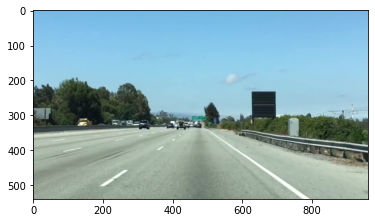

In [0]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]
color_thresholding(color_select, rgb_threshold, [0,0,0])
plt.imshow(color_select)

I want you to modify the values of the variables red_threshold, green_threshold, and blue_threshold until you are able to retain as much of the lane lines as possible, while getting rid of most of the other stuff. When you run the code in the quiz, your image will be output with an example image next to it. Tweak these variables such that your input image (on the left below) looks like the example image on the right.

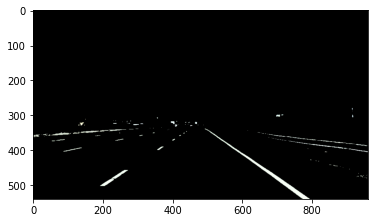

In [0]:

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]
color_thresholds = color_thresholding(color_select, rgb_threshold, [0,0,0])
plt.imshow(color_select)

Region select code

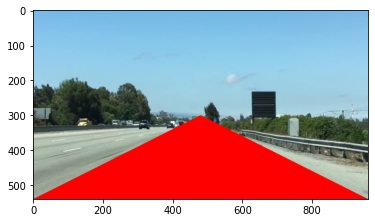

In [0]:
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, 300]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left, fit_right, fit_bottom = fit_lines(left_bottom, right_bottom, apex)

# Find the region inside the lines
region_thresholds = find_region(xsize, ysize, fit_left, fit_right, fit_bottom)

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
# plt.show()

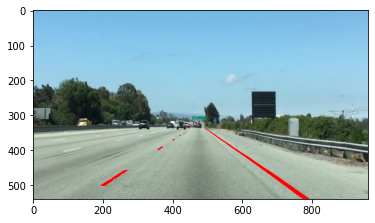

In [0]:
# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
line_image = np.copy(image)

# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

# uncomment if plot does not display
# plt.show()